# Vectorized String Operations


# A. Pandas String Operation

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s if s is None else s.capitalize() for s in data]

['Peter', 'Paul', None, 'Mary', 'Guido']

In [3]:
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

# B. Tables of Pandas String Methods

In [4]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

### B.1. Methods Similar to Python String Methods
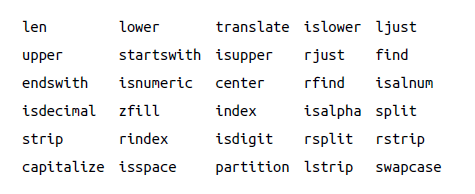

In [5]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [6]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [7]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [8]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### B.2. Methods using Regular Expressions

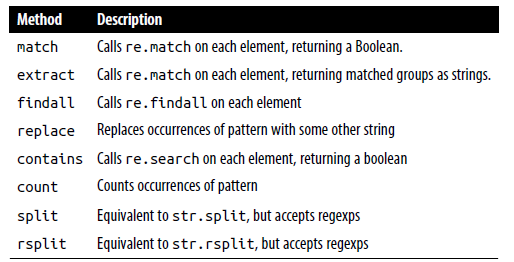

In [9]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [10]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### B.3. Miscellaneous Methods

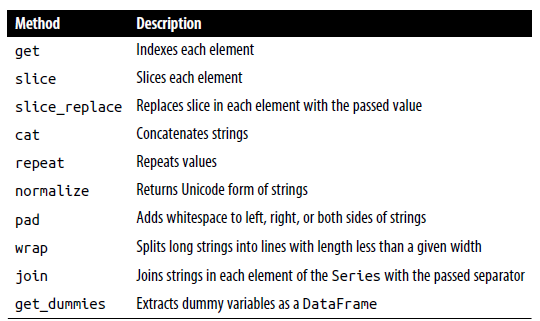

##### B.3.a. Vectorized item access and slicing


In [11]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [12]:
monte.str.split().str[-1]

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

##### B.3.b. Indicator Variables


In [13]:
full_monte = pd.DataFrame({'name': monte,
                            'info': ['B|C|D', 'B|D', 'A|C',
                            'B|D', 'B|C', 'B|C|D']})

full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [14]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# C. Example: Recipe Database

In [16]:
recipes = pd.read_json('data/recipeitems.json', lines=True)
recipes.head()

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN


In [17]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [18]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [19]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [20]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [21]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [22]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

### C.1. A Simple Recipe Recommender



In [23]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [24]:
import re
spice_df = pd.DataFrame({ spice: recipes.ingredients.str.contains(spice, re.IGNORECASE)
                        for spice in spice_list})
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [25]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [26]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object